In [ ]:
!pip install gensim

방법1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [2]:
##1000건의 데이터
#file = r'C:\Users\user\ohg\in_data\중학생+질문 20201005-1(질문).csv'

#84460건의 데이터
file = r'C:\Users\user\ohg\in_data\중학생+질문 20201202(QA).csv'
df = pd.read_csv(file) 
train_data = df = pd.read_csv(file) 


In [3]:
# 데이터건수 출력
print(len(train_data))
# NULL 값 존재 유무
print(train_data.isnull().values.any())

84460
False


In [4]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['question'] = train_data['question'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [5]:
print(train_data)

                date                                           question  \
0       2020.10.02.   차 재난지원금 중학생 질문이용 제가 광주광역시 중학생입니다 북구 신용중인데 차 재난...   
1       2020.02.06.   중학생 인강 질문 질문  중학생 과목별 인강 추천해주세요 질문  인강으로 어떻게 공...   
2       2020.04.05.   인천서구정신건강복지센터 중학생 질문  중학생이고 이시국에 가도 되나요 정신적으로 문...   
3       2020.02.13.   중학생이 쌍수 질문 드립니다  전문인분들 제 질문에 자세히 답 좀 부탁드려요 ㅜㅁㅜ...   
4       2020.06.02.   예비 중학생 질문 내공냠냠튀면 신고요 저 예비 중학생인데 제가 낯가림도 심하고 적응...   
...              ...                                                ...   
84455   2017.10.25.   중학생 냉 질염 질문  그래서 요즘 자주 팬티가 축축해요ㅜㅠ 질문은 냉 어떻게 할까...   
84456   2019.12.05.   중학생인데 눈위치에 의문을 가져 질문를 올려봅니다 제가 거울을 보거나 카메라 셀카모...   
84457   2017.03.26.   중학생염색 질문 중학생 어제도 물어봤는데 오늘또 물어봅니다 중학생이고 방학이에요 이...   
84458   2008.08.18.   예비중학생 준비물 질문 안녕하세요 올해 살인 초딩입니다ㅇㅇ 반년만 지나면 중학생이 ...   
84459   2009.12.10.    예비 중학생의 질문   고민끝에 지식인에 질문하게 됐네요 최대한 성의껏해주세요  ...   

                                                  answer  \
0      위의 보건복지부 보도참고자료(9.22 발표)에 나와 있듯이

In [6]:
# 불용어 정의 및 가져오기
stopwords = open("./stopword/stopword.txt", encoding = "UTF8").read()
print(stopwords)

﻿중학생
질문
제
좀
요
때
저
답변
내공
이제
중
지금
가지
추천
전
것
뭐
정도
이번
대해
이
올해
가요
그냥
하나요
답
안
날
요즘
곳
해
더
번
막
곧
성의껏
애
거
일단
꼭
현재
정말
조금
저희
한번
보통
참고
부탁
또
등
관련
지식인
거기
쪽
게
몇개
무엇
이면
제일
데
예
진짜
우선
저가
등등
해도
여러가지
혹시
거의
이구
원래
혹시
뭔가
몇
고요
만약
헤헤
약간
때문
가장
여기
별로
고
존나
죄송
흣
아시
대답
못
성심
대부분
쫌
를
내
헤
살짝
먼저
다시
호호
뭘
과
자주
다음
미래
여러분
얼마나
이상
자신
우리
아주
꽤
무슨
동안
겸
평소
새끼
어제
모두
전체
그때
자기
하자
웬만큼
오
쯤
무쟈
나중
내일
법좀
대충
얘
주로
처
왜
처럼
갑자기
나
외
제발
정성껏
전혀
래서
네
부쩍
그때되
요기
어디가
하이
옛날
점점
뎅
아마
잠깐
만쿤
것습니
후기
비롯
함
서로
이건
한가지
각각
겉
다음주
저녁
관해
이요
몇시
답좀
아예
짓
그다음
무척
떈
가튼뎁
대략
뇬
우린
웃
땐
그거
겹
모든
확
안녕
전부
이예
밨
간다
무조건
따라서
한편
제대로
이쯤
며칠
체적
그게
요약
건가
떄문












In [7]:
# 형태소 분석기 OKT를 사용한 토큰화 작업
okt = Okt()
tokenized_data = []
for sentence in train_data['question']:
    #temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = okt.nouns(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

In [9]:
print('총 샘플 수 :',len(tokenized_data))

총 샘플 수 : 84460


In [14]:
#명사로 토큰화 한것 저장
tokenized = pd.DataFrame()
tokenized['tokenized'] = tokenized_data

tokenized_file="./out_data/토큰화_명사들_중학생+질문 20201202(질문).csv" #sys.argv[2]
tokenized.to_csv(tokenized_file, encoding='UTF8', index= False)

In [ ]:
# 질문 길이 분포 확인
print('질문의 최대 길이 :',max(len(l) for l in tokenized_data))
print('질문의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

Word2vec 빈도수 5번이상 인 것 모델링

In [15]:
# train model (빈도수 5번이상인 데이터)
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [20]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(792, 100)

In [ ]:
print(model.wv.most_similar("교복"))

In [ ]:
print(model.wv.most_similar("친구"))

In [ ]:
print(model)

In [ ]:
from gensim.models import KeyedVectors
# 모델 저장
model.wv.save_word2vec_format('./question_nouns_w2v') 

In [ ]:
# 모델 로드
loaded_model = KeyedVectors.load_word2vec_format("./question_nouns_w2v") 

In [ ]:
print(loaded_model)

In [ ]:
# summarize vocabulary save
vocabs = pd.DataFrame()
vocabs['vocab'] = list(loaded_model.wv.vocab)
print(vocabs)


In [ ]:
#word2vec 모델링 한 단어 저장
output_file ="./out_data/모델링한단어_중학생+질문 20201202(질문).csv" #sys.argv[2]
vocabs.to_csv(output_file, encoding='UTF8', index= False)

In [ ]:
vocabs['value'] = list(loaded_model.wv.vocab.values())
print(vocabs)

In [ ]:
#word2vec 모델링 한 단어 및 값 저장
output_file2 ="./out_data/모델링한단어_값_중학생+질문 20201202(질문).csv" #sys.argv[2]
vocabs.to_csv(output_file2, encoding='UTF8', index= False)

In [ ]:
!python -m gensim.scripts.word2vec2tensor --input question_nouns_w2v --output question_nouns_w2v

구글의 임베딩 프로젝터를 사용해서 워드 임베딩 모델을 시각화

In [ ]:
https://projector.tensorflow.org/

Word2vec 빈도수 1번이상 인 것 모델링

In [16]:
# train model (빈도수 1번이상인 데이터)
model2 = Word2Vec(tokenized_data, min_count=1)
# summarize the loaded model
print(model2)

Word2Vec(vocab=2766, size=100, alpha=0.025)


In [ ]:
# summarize vocabulary
words = pd.DataFrame()
words['vocab'] = list(model2.wv.vocab.keys())
print(words)
#word2vec 모델링 한 단어 저장
output_file3 ="./out_data/전체단어_중학생+질문 20201202(질문).csv" #sys.argv[2]
words.to_csv(output_file3, encoding='UTF8', index= False)


In [ ]:
words['value'] = list(model2.wv.vocab.values())
print(words)

In [ ]:
#word2vec 모델링 한 단어 및 값 저장
output_file4 ="./out_data/전체단어_값_중학생+질문 20201202(질문).csv" #sys.argv[2]
words.to_csv(output_file4, encoding='UTF8', index= False)


In [17]:
# access vector for one word
print(model2['고백'])

[ 0.00945224  0.04826647 -0.0415023  -0.04539126  0.08993279  0.01884696
  0.04446571  0.04665734 -0.01886771 -0.02925069  0.10417367  0.02241412
  0.01905952 -0.04788915 -0.01148746  0.06072237  0.05237992 -0.06738043
  0.0379853  -0.00679109  0.11752357  0.05023434 -0.04577442 -0.07075732
  0.02652784  0.07067788 -0.10561123 -0.03505634 -0.01836342 -0.04132413
 -0.01438569  0.00800113  0.00122935 -0.08676986  0.01358184  0.01441368
 -0.02426269  0.0147252  -0.06003165  0.00549037 -0.09410544  0.07401066
 -0.03972585 -0.0567094   0.00487757 -0.11174136  0.06970887  0.01141325
 -0.13235962 -0.03935952  0.09001642 -0.0390177  -0.10207537 -0.093097
 -0.00368688  0.1350658  -0.02972013 -0.04891274 -0.0567662  -0.00895891
 -0.00290499 -0.11042237 -0.02913016  0.01871391 -0.08394911 -0.02436304
 -0.02258927 -0.02209077 -0.04596447 -0.05446008 -0.00181568 -0.0358428
  0.02759156 -0.00745512 -0.0778847  -0.0308743  -0.07551029  0.01494182
 -0.02407753 -0.04058778  0.00309438 -0.03577988  0.07

<ipython-input-17-bdbb5b959237>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model2['고백'])


In [ ]:
# access vector for one word
print(model2['작성'])

In [18]:
from gensim.models import KeyedVectors
# 모델 저장
model2.wv.save_word2vec_format('./question_total_nouns_w2v') 

In [36]:
# save model(bin)
model2.save('model2.bin')

In [37]:
!python -m gensim.scripts.word2vec2tensor --input question_total_nouns_w2v --output question_total_nouns_w2v

2020-12-17 22:23:33,870 - word2vec2tensor - INFO - running C:\Users\user\anaconda3\lib\site-packages\gensim\scripts\word2vec2tensor.py --input question_total_nouns_w2v --output question_total_nouns_w2v
2020-12-17 22:23:33,870 - utils_any2vec - INFO - loading projection weights from question_total_nouns_w2v
2020-12-17 22:23:34,211 - utils_any2vec - INFO - loaded (2766, 100) matrix from question_total_nouns_w2v
2020-12-17 22:23:34,491 - word2vec2tensor - INFO - 2D tensor file saved to question_total_nouns_w2v_tensor.tsv
2020-12-17 22:23:34,491 - word2vec2tensor - INFO - Tensor metadata file saved to question_total_nouns_w2v_metadata.tsv
2020-12-17 22:23:34,491 - word2vec2tensor - INFO - finished running word2vec2tensor.py


PCA

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

계층적 클러스터링

In [35]:
#Word2vec로 모델링 된 데이터 팬더스를 이용해 csv파일로 읽어오기
quesiton_df = pd.read_csv("question_nouns_w2v", delimiter=' ', header=0)

# 선두에서 5행까지 표시
quesiton_df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,792,100
네이버,0.202362,-0.137119,1.138420,-0.007392,-0.157763,-0.145060,-0.580353,0.244567,-0.420604,0.076518,1.608154,0.588844,0.542207,0.303852,-0.204690,0.630015,0.332524,0.073375,1.820223,-0.042554,0.358435,-1.131308,1.081506,-0.439184,1.364893,0.445223,0.297860,-0.244210,-0.554132,0.325085,-1.019371,-1.302766,-0.500325,-0.080934,-0.502784,-0.056137,0.069704,-0.176414,0.112236,-0.210486,1.128131,-0.149743,0.477145,0.491400,0.597502,-0.876474,-0.018914,0.962293,0.468510,1.087158,-0.279126,-1.303709,-1.925717,2.049368,-1.097368,-0.861680,0.980608,-0.063649,-0.475311,1.477670,1.021566,-0.577401,0.556776,-0.096777,0.937305,-0.417965,-0.116518,0.480475,-0.492855,0.229866,-0.341986,0.001287,0.397077,0.637923,0.015432,0.440239,0.227037,0.096195,0.047851,-0.449791,0.663767,0.771461,-1.030114,0.820228,-1.757264,-0.360062,-0.274644,-0.402823,0.612187,0.910269,-0.139856,0.078023,-0.036507,-0.342693,-0.072617,-0.711011,0.198942,-0.314803,0.790024,-0.222108
블로그,-0.343729,-0.292729,0.529137,-0.575116,0.177514,-0.545391,-0.166849,0.390349,-0.052822,0.180741,0.232011,0.461686,0.489660,0.873808,-0.426465,0.683904,0.094713,0.481041,1.413385,-0.035487,1.097447,-1.104643,0.787120,-1.073337,0.251263,-0.106774,0.247815,-0.208862,-0.251947,0.169144,-1.352238,-0.275687,-0.022497,0.473496,0.786222,0.488466,0.221533,0.136093,-0.367973,0.236443,1.160371,0.123381,-0.261796,-0.105828,0.081897,-1.458368,0.387000,0.803143,0.514473,0.467702,-0.005938,-1.711471,-1.384591,2.027574,-0.875856,-1.196401,0.245361,0.829900,-0.208052,1.216605,0.987225,-1.077028,1.294361,-0.303807,0.299312,-0.016629,-0.896085,0.707499,-0.552444,-0.233090,-0.680926,-0.067377,0.987406,1.050431,0.591263,1.050185,-0.006799,0.322736,0.204436,-0.322061,1.520153,0.789368,-0.072785,0.499532,-0.904030,-0.535517,-1.105227,-0.008369,1.415631,0.726057,-0.085578,0.169831,0.585977,-0.650578,0.276425,0.512849,-0.028826,0.859866,0.867643,-0.475611
머리,-1.037378,-0.937341,-1.065663,-0.851314,0.070885,1.279916,2.302832,-0.687132,1.558237,-2.746522,0.052129,0.777754,0.778521,0.909242,0.226128,0.275575,-2.426265,-0.798097,0.352214,-0.126273,-1.710620,-0.485203,-0.383586,-2.344498,0.214989,-0.012559,1.575091,-1.861009,2.230957,0.623502,1.544644,1.379158,1.560919,-1.011946,-0.258021,1.334745,-0.014859,-0.329270,-0.706821,1.937211,0.074579,-0.734392,-1.269865,1.708508,2.706964,-3.482476,0.052539,-0.445348,-1.291142,1.354555,-1.216117,-0.850961,0.710799,-1.992592,-1.151969,1.343775,-2.603259,0.393479,-0.890198,0.755090,-0.226470,0.415593,-1.656983,-1.296590,1.987743,2.123875,1.003068,-0.814886,-0.372353,-0.449551,1.511664,0.398649,1.803023,1.924024,-4.316981,-0.850814,-1.311600,0.890182,3.144797,-3.145522,-0.819055,-0.311020,1.094793,0.000076,1.735190,1.010608,-1.327623,1.950490,-2.138094,-0.478866,-0.068534,0.677688,-0.117763,-0.240778,2.259943,-0.478573,1.144384,-2.553626,-0.266750,-0.403803
가방,-0.022251,0.791623,-0.527532,-0.867452,-1.702615,0.812988,-1.695398,-0.443651,3.436850,1.115826,1.475312,-0.546969,2.666135,2.357207,0.100707,-1.073137,0.834700,-2.350154,1.153413,0.597956,-2.399149,0.531969,-0.038879,2.626621,0.167234,-0.146520,-2.614818,-2.831977,-0.047603,1.939708,1.832926,0.218436,-0.451230,2.490055,0.633021,0.182128,-0.187774,1.940471,-2.638125,1.106515,-0.982047,-2.591677,-1.184027,-0.495264,-0.988390,-2.781913,-0.951601,-0.209276,1.012546,-0.907213,-0.608880,0.984791,1.640034,2.341065,0.315599,-0.011492,0.173267,-0.954739,-0.373519,0.228934,-0.627727,-0.810023,0.143029,-0.416908,-2.961034,-0.423693,-1.670211,0.656742,-0.286175,-0.640540,0.076673,0.669359,1.240188,-0.563024,0.164987,0.695506,0.606898,-0.539069,-1.294031,-2.097890,-2.701988,1.702087,-1.209766,-1.444212,-1.455601,-1.428853,-2.220738,0.728758,-0.821145,-1.535860,-0.494049,1.755033,-0.322506,-0.441391,1.829810,-2.047519,-1.248509,-2.196384,3.164449,-1.714253
예비,1.371634,1.874777,-1.872885,-0.665672,1.447240,-1.286686,0.247121,-1.37

In [42]:
#헤더에 열이름 추가하기
header_list = []
for i in range(1,101):
    header_list.append(i)
print(header_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [44]:
#
question_df = []
quesiton_df = pd.read_csv("question_nouns_w2v", delimiter=' ', header=0, names = header_list)

# 선두에서 5행까지 표시
quesiton_df.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
네이버,0.202362,-0.137119,1.138420,-0.007392,-0.157763,-0.145060,-0.580353,0.244567,-0.420604,0.076518,...,-0.139856,0.078023,-0.036507,-0.342693,-0.072617,-0.711011,0.198942,-0.314803,0.790024,-0.222108
블로그,-0.343729,-0.292729,0.529137,-0.575116,0.177514,-0.545391,-0.166849,0.390349,-0.052822,0.180741,...,-0.085578,0.169831,0.585977,-0.650578,0.276425,0.512849,-0.028826,0.859866,0.867643,-0.475611
머리,-1.037378,-0.937341,-1.065663,-0.851314,0.070885,1.279916,2.302832,-0.687132,1.558237,-2.746522,...,-0.068534,0.677688,-0.117763,-0.240778,2.259943,-0.478573,1.144384,-2.553626,-0.266750,-0.403803
가방,-0.022251,0.791623,-0.527532,-0.867452,-1.702615,0.812988,-1.695398,-0.443651,3.436850,1.115826,...,-0.494049,1.755033,-0.322506,-0.441391,1.829810,-2.047519,-1.248509,-2.196384,3.164449,-1.714253
예비,1.371634,1.874777,-1.872885,-0.665672,1.447240,-1.286686,0.247121,-1.374274,-0.991569,0.583911,...,-1.818094,0.627282,-2.652692,0.760708,2.545207,-1.802850,-0.141886,-3.033145,1.415749,-2.906589


In [45]:
# MinMaxScaler의 로드
from sklearn.preprocessing import MinMaxScaler

## 데이터 세트에서 목적변수를 제외
#quesiton_df = tokenized_data.drop('y', axis=1)

# 범위변환의 인스턴스를 생성
mc = MinMaxScaler()
mc.fit(quesiton_df)

# bank_df의 각항목을 정규화
question_df_mc = pd.DataFrame(mc.transform(quesiton_df))
question_df_mc.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.440017,0.465431,0.746243,0.538965,0.385351,0.471087,0.550229,0.503906,0.407030,0.534700,...,0.483245,0.523669,0.477420,0.455904,0.519338,0.336928,0.611318,0.506318,0.696853,0.465355
1,0.391099,0.446134,0.676339,0.477426,0.421128,0.427356,0.587795,0.520899,0.446050,0.546474,...,0.488902,0.534250,0.543288,0.416531,0.546658,0.466869,0.587389,0.638070,0.702899,0.439670
2,0.328964,0.366197,0.493363,0.447487,0.409749,0.626745,0.812157,0.395304,0.616974,0.215787,...,0.490678,0.592782,0.468822,0.468937,0.701912,0.361606,0.710643,0.255210,0.614536,0.446945
3,0.419897,0.580603,0.555105,0.445738,0.220504,0.575740,0.448931,0.423685,0.816283,0.652109,...,0.446332,0.716948,0.447157,0.443282,0.668245,0.195026,0.459253,0.295279,0.881808,0.314169
4,0.544758,0.714924,0.400749,0.467610,0.556616,0.346380,0.625402,0.315208,0.346454,0.592019,...,0.308343,0.586972,0.200590,0.597010,0.724241,0.221003,0.575511,0.201427,0.745593,0.193360


In [47]:
# StandardScaler의 로드
from sklearn.preprocessing import StandardScaler

# Z변환 인스턴스 생성
sc = StandardScaler()
sc.fit(quesiton_df)

# bank_df의 각항목을 정규화
quesiton_df_sc = pd.DataFrame(sc.transform(quesiton_df), columns=quesiton_df.columns)
quesiton_df_sc.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,0.256192,0.017872,1.153772,-0.129887,-0.233913,-0.077694,-0.580001,0.307176,-0.431694,-0.009392,...,-0.133655,0.112896,-0.081721,-0.412198,-0.146682,-0.846651,0.277528,-0.270140,0.920067,-0.228504
1,-0.327412,-0.189285,0.458634,-0.741110,0.181096,-0.504836,-0.175660,0.467578,-0.002358,0.098732,...,-0.076346,0.210346,0.560411,-0.791478,0.196464,0.601265,0.010295,1.153584,1.000160,-0.535847
2,-1.068712,-1.047430,-1.360893,-1.038470,0.049109,1.442719,2.239294,-0.717969,1.878343,-2.938072,...,-0.058350,0.749417,-0.165542,-0.286650,2.146480,-0.571659,1.386784,-2.983642,-0.170385,-0.448789
3,0.016150,1.254268,-0.746933,-1.055845,-2.146145,0.944519,-1.670338,-0.450067,4.071376,1.068809,...,-0.507627,1.892977,-0.376747,-0.533782,1.723613,-2.427837,-1.420719,-2.550656,3.370164,-2.037562
4,1.505788,2.696226,-2.281863,-0.838604,1.752773,-1.295779,0.229136,-1.474029,-1.098222,0.516988,...,-1.905612,0.695913,-2.780484,0.947069,2.426926,-2.138376,-0.122354,-3.564828,1.565735,-3.483135


In [48]:
# 각 항목의 평균과 표준편차를 확인
print(quesiton_df_sc.mean())
print(quesiton_df_sc.std())

1      1.242342e-17
2      3.644672e-17
3      1.002285e-17
4      1.423262e-17
5      6.348387e-17
           ...     
96     1.361714e-17
97    -3.575020e-17
98    -1.464527e-16
99     1.256360e-17
100    1.470134e-17
Length: 100, dtype: float64
1      1.000632
2      1.000632
3      1.000632
4      1.000632
5      1.000632
         ...   
96     1.000632
97     1.000632
98     1.000632
99     1.000632
100    1.000632
Length: 100, dtype: float64


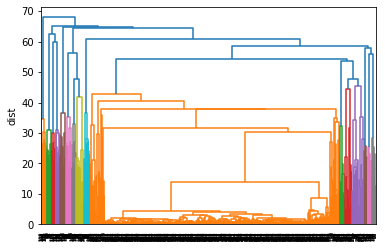

In [49]:
# Linkage, Dendrogram의 로드
from scipy.cluster.hierarchy import linkage, dendrogram
# Matplotlib의 로드
import matplotlib.pyplot as plt
%matplotlib inline

# 계층적 클러스터링의 실행
hcls = linkage(quesiton_df_sc, metric='euclidean', method='ward')
dendrogram(hcls)

# 덴드로그램의 작성
plt.ylabel('dist')
plt.show()